In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
dados = [(1,90489),
(2,90193),
(3,89725),
(4,89673),
(5,89609),
(6,89482),
(7,89561),
(8,89820),
(9,89190),
(10,89210),
(11,88920),
(12,87968),
(13,87729),
(14,87554),
(15,88351),
(16,86664),
(17,86219),
(18,86601),
(19,86939),
(20,84287),
(21,85325),
(22,85651),
(23,83861),
(24,83341),
(25,83907),
(26,82800),
(27,82832),
(28,83110),
(29,82210),
(30,82036),
(31,82373),
(32,82059),
(33,82027),
(34,81714),
(35,81501),
(36,81030)]

In [3]:
print(dados)

[(1, 90489), (2, 90193), (3, 89725), (4, 89673), (5, 89609), (6, 89482), (7, 89561), (8, 89820), (9, 89190), (10, 89210), (11, 88920), (12, 87968), (13, 87729), (14, 87554), (15, 88351), (16, 86664), (17, 86219), (18, 86601), (19, 86939), (20, 84287), (21, 85325), (22, 85651), (23, 83861), (24, 83341), (25, 83907), (26, 82800), (27, 82832), (28, 83110), (29, 82210), (30, 82036), (31, 82373), (32, 82059), (33, 82027), (34, 81714), (35, 81501), (36, 81030)]


In [4]:
dataset = pd.DataFrame(dados, columns =['Identificador','Valor']) 

In [5]:
dataset.head(10)

,Identificador,Valor
0,1,90489
1,2,90193
2,3,89725
3,4,89673
4,5,89609
5,6,89482
6,7,89561
7,8,89820
8,9,89190
9,10,89210


In [6]:
media = dataset['Valor'].mean()

In [7]:
media

85943.36111111111

In [8]:
# Calculando o SSE
squared_erros = pd.Series(media - dataset['Valor'])**2
SSE = np.sum(squared_erros)
print ('Soma dos Quadrados do Erros (SSE): %01.f' % SSE)

Soma dos Quadrados do Erros (SSE): 348975526


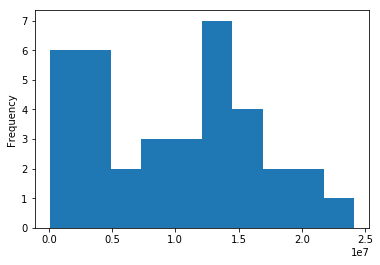

In [9]:
# Histograma dos erros
hist_plot = squared_erros.plot('hist')

In [10]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias =0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (obsservations - min(bias,1)))

In [11]:
# Definindo o range dos valores de x e y
x_range = [dataset['Identificador'].min(),dataset['Identificador'].max()]
y_range = [dataset['Valor'].min(),dataset['Valor'].max()]

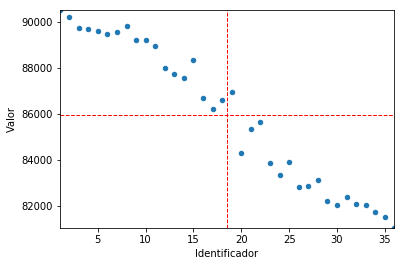

In [12]:
#Plot dos valor de x e y com a media
scatter_plot = dataset.plot(kind = 'scatter', x = 'Identificador', y = 'Valor', xlim= x_range, ylim=y_range )

#Calculo da media
meanY = scatter_plot.plot(x_range, [dataset['Valor'].mean(), dataset['Valor'].mean()], '--', color = 'red', linewidth =1)
meanx = scatter_plot.plot([dataset['Identificador'].mean(), dataset['Identificador'].mean()], y_range, '--', color = 'red', linewidth =1)

## Scikit-Learn

In [13]:
from sklearn import linear_model

In [14]:
modelo = linear_model.LinearRegression(normalize= False, fit_intercept = True)

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [16]:
#Define os valores de x e y
num_observ = len(dataset)
x = dataset['Identificador'].values.reshape((-1, 1))
y = dataset['Valor'].values

In [17]:
#Definindo o range de data
Data=[]
Mes = [1,2,3,4,5,6,7,8,9,10,11,12]
Ano = [2016,2017,2018,2019]
for a in Ano:
    for b in Mes:
        Data.append("%s-%s" %(a,b))

In [18]:
model = LinearRegression()

In [19]:
# Aplica o modelo - fit()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
model = LinearRegression().fit(x,y)

In [21]:
r_sq = model.score(x, y)
print('coefficient of determination (taxa de acerto):', r_sq)

coefficient of determination (taxa de acerto): 0.9615427526327751


In [22]:
# Imprime os coeficentes
print ('interseção:', model.intercept_)
print ('tempo(declive):', model.coef_)

interseção: 91380.34444444445
tempo(declive): [-293.89099099]


In [23]:
y_pred = model.predict(x)

In [24]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[91086.45345345 90792.56246246 90498.67147147 90204.78048048
 89910.88948949 89616.9984985  89323.10750751 89029.21651652
 88735.32552553 88441.43453453 88147.54354354 87853.65255255
 87559.76156156 87265.87057057 86971.97957958 86678.08858859
 86384.1975976  86090.30660661 85796.41561562 85502.52462462
 85208.63363363 84914.74264264 84620.85165165 84326.96066066
 84033.06966967 83739.17867868 83445.28768769 83151.3966967
 82857.50570571 82563.61471471 82269.72372372 81975.83273273
 81681.94174174 81388.05075075 81094.15975976 80800.26876877]


## Outra forma

In [25]:
y_pred = model.intercept_ + model.coef_ * x

In [26]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[[91086.45345345]
 [90792.56246246]
 [90498.67147147]
 [90204.78048048]
 [89910.88948949]
 [89616.9984985 ]
 [89323.10750751]
 [89029.21651652]
 [88735.32552553]
 [88441.43453453]
 [88147.54354354]
 [87853.65255255]
 [87559.76156156]
 [87265.87057057]
 [86971.97957958]
 [86678.08858859]
 [86384.1975976 ]
 [86090.30660661]
 [85796.41561562]
 [85502.52462462]
 [85208.63363363]
 [84914.74264264]
 [84620.85165165]
 [84326.96066066]
 [84033.06966967]
 [83739.17867868]
 [83445.28768769]
 [83151.3966967 ]
 [82857.50570571]
 [82563.61471471]
 [82269.72372372]
 [81975.83273273]
 [81681.94174174]
 [81388.05075075]
 [81094.15975976]
 [80800.26876877]]


## Prevendo datas futuras

In [36]:
x_new = np.arange(len(Data)).reshape((-1, 1))

In [38]:
y_new = model.predict(x_new)

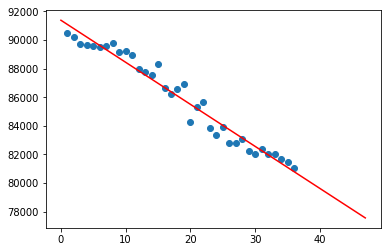

In [39]:
plt.scatter(x , y )
plt.plot(x_new, y_new, color='red') 
plt.show()  

In [46]:
dados2 = list(zip(Data,y_new.astype(int)))

In [48]:
dataset2 = pd.DataFrame(dados2, columns =['Data','ValorPrevisto']) 
    

In [51]:
dataset2

,Data,ValorPrevisto
0,2016-1,91380
1,2016-2,91086
2,2016-3,90792
3,2016-4,90498
4,2016-5,90204
5,2016-6,89910
6,2016-7,89616
7,2016-8,89323
8,2016-9,89029
9,2016-10,88735
